In [52]:
import numpy as np
from scipy.fftpack import dct
from skimage.io import imread, imshow
from skimage.measure import shannon_entropy
import matplotlib.pyplot as plt

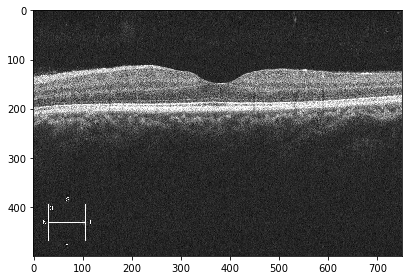

In [53]:
X = imread("NORMAL1.jpeg")
#Taking the first of the 3 channels, as they are all the same.
X = X[:,:,0]
h, w = X.shape
imshow(X)

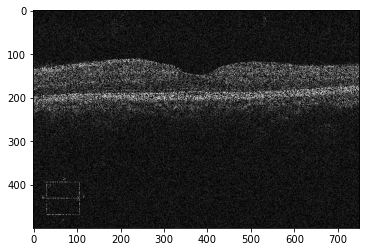

In [54]:
compression_factor = 2
# mask = np.zeros((h,w))
# mask[:,np.arange(0, w, compression_factor)] = 1
mask = np.random.randint(2, size=(h,w))
D = X*mask
plt.imshow(X*mask, cmap="gray")

In [55]:
# B1, S, B2t = np.linalg.svd(D, full_matrices=True)
B1 = dct(np.eye(h), norm='ortho', axis=0).T
B2t = dct(np.eye(w), norm='ortho', axis=0)
W = np.linalg.inv(B1) @ D @ np.linalg.inv(B2t)
tau = 1
a = 1.5
# plt.imshow(B1 @ W @ B2t)

In [56]:
def SoftThresh(x, tau):
    # numpy automatically applies functions to each element of the array
    return np.sign(x)*np.maximum(0, np.abs(x) - tau)

def ShrinkageOperator(X, tau):
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    S = np.diag(SoftThresh(S,tau))
    return U @ S @ Vt

def Proj(X, mask):
    return X*(mask == 1)

def Update1(mask, B1, B2t, W, D, a):
    Z = Proj(B1 @ W @ B2t, mask) - D
    Z = B1.T @ Z @ B2t.T
    return W - a*Z

def Update2(W, tau):
    return ShrinkageOperator(W, tau)


25040.25255394933
25033.518348204267
25026.786914393222
25020.05825060683
25013.332354859747
25006.609225081047
24999.888859088805
24993.1712545411
24986.456408843733
24979.744318962836
24973.034980989843
24966.328301303303
24959.624185932367
24952.92270301453
24946.223923071586
24939.527868358047
24932.8345474465
24926.143963398026
24919.45611672151
24912.771006613366
24906.08863150074
24899.408989247837
24892.732077115317
24886.05773930772
24879.385970657666
24872.7168570936
24866.050439829745
24859.386732256073
24852.725738815436
24846.067460355658
24839.411896118952
24832.7590445686
24826.108903770182
24819.46147158978
24812.816745822936
24806.1747243089
24799.535405057766
24792.898786403326
24786.264867188354
24779.63353740273
24773.004764828995
24766.378613865858
24759.755126200387
24753.134314095616
24746.516180115825
24739.900721880895
24733.28780832328
24726.67744877886
24720.069715559803
24713.464638816473
24706.862229240727
24700.262490810503
24693.665424598545
24687.0710303

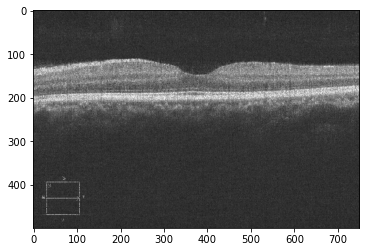

In [58]:
iters = 5000
for i in range(iters):
    W = Update1(mask, B1, B2t, W, D, a)
    W = Update2(W, tau)
    print(np.linalg.norm(X - B1 @ W @ B2t))

plt.imshow(B1 @ W @ B2t, cmap="gray")

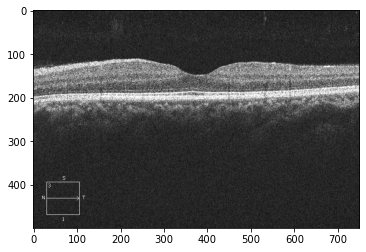

In [59]:
plt.imshow(X, cmap="gray")